<a href="https://colab.research.google.com/github/Ashish186-code/speech-to-text-and-vice-versa/blob/main/tts_robothon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> 
    <h1> Transformer TTS: A Text-to-Speech Transformer in TensorFlow 2 </h1>
    <h2> Audio synthesis with Forward Transformer TTS and MelGAN Vocoder</h2>
</center>

## Forward Model

In [ ]:
# Clone the Transformer TTS and MelGAN repos
!git clone https://github.com/as-ideas/TransformerTTS.git
!git clone https://github.com/seungwonpark/melgan.git

Cloning into 'TransformerTTS'...
remote: Enumerating objects: 4191, done.
remote: Counting objects: 100% (730/730), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 4191 (delta 519), reused 676 (delta 497), pack-reused 3461
Receiving objects: 100% (4191/4191), 26.02 MiB | 22.11 MiB/s, done.
Resolving deltas: 100% (2889/2889), done.
Cloning into 'melgan'...
remote: Enumerating objects: 396, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 396 (delta 78), reused 71 (delta 71), pack-reused 306
Receiving objects: 100% (396/396), 18.03 MiB | 25.23 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [ ]:
# Install requirements
!apt-get install -y espeak
!pip install -r TransformerTTS/requirements.txt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,220 kB of archives.
After this operation, 3,060 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libsonic0 amd64 0.2.0-8 [13.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 espeak-data amd64 1.48.04+dfsg-8build1 [932 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libespeak1 amd64 1.48.04+dfsg-8build1 [147 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 espeak amd64 1.48.04+dfsg-8build1 [61.8 kB]
Fetched 1,220 kB i

In [ ]:
!cd TransformerTTS/; git checkout c3405c53e435a06c809533aa4453923469081147

Note: switching to 'c3405c53e435a06c809533aa4453923469081147'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at c3405c5 Fix path.


In [ ]:
# Set up the paths
from pathlib import Path
MelGAN_path = 'melgan/'
TTS_path = 'TransformerTTS/'

import sys
sys.path.append(TTS_path)

In [ ]:
!pip install ruamel.yaml phonemizer pyworld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 KB 7.9 MB/s eta 0:00:00
  Using cached pyworld-0.3.2-cp39-cp39-linux_x86_64.whl
  Using cached ruamel.yaml.clib-0.2.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (519 kB)
  Using cached segments-2.2.1-py2.py3-none-any.whl (15 kB)
  Using cached clldutils-3.19.0-py2.py3-none-any.whl (1.7 MB)
  Using cached csvw-3.1.3-py2.py3-none-any.whl (56 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached rdflib-6.3.2-py3-none-any.whl (528 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Using cached language_tags-1.2.0-py3-none-any.whl (213 kB)
  Using cached isodate-0.6.1-py2.py3-none-any.whl (41 kB)


In [ ]:
# Load pretrained model
from model.factory import tts_ljspeech
from data.audio import Audio

model, config = tts_ljspeech()
audio = Audio(config)

In [ ]:
# Synthesize text
a='mein lieblingsfache ist Mathematik'
sentence = a
out_normal = model.predict(sentence)

In [ ]:
!pip install sounddevice wavio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Convert spectrogram to wav (with griffin lim)
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv
wav = audio.reconstruct_waveform(out_normal['mel'].numpy().T)
wv.write("recording1.wav", wav, 44100, sampwidth=2)

In [ ]:
import IPython.display as ipd

ipd.display(ipd.Audio(wav, rate=config['sampling_rate']))

In [ ]:
import numpy as np

You can also vary the speech speed

In [ ]:
import librosa
import matplotlib.pyplot as plt

scale, sr = librosa.load("recording1.wav")
FRAME_SIZE = 2048
HOP_SIZE = 512
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
Y_scale = np.abs(S_scale) ** 2

def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")


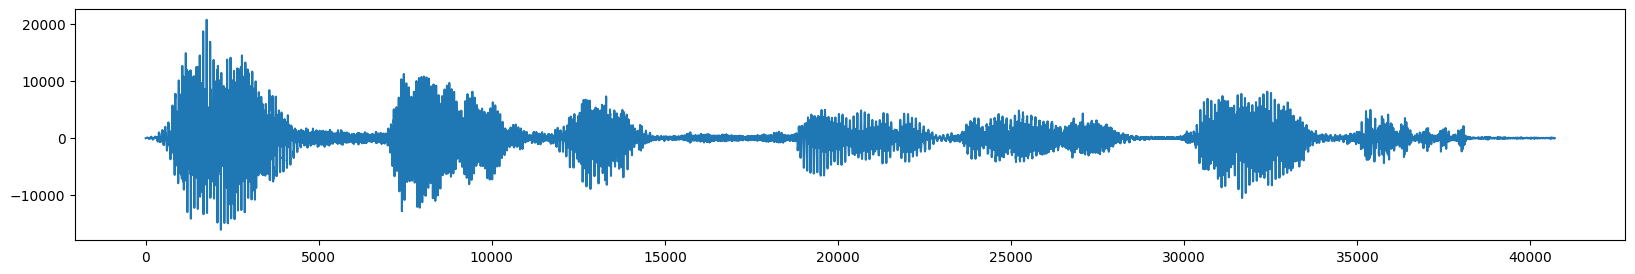

In [ ]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
rate, data = wavfile.read("recording1.wav")
fig,ax=plt.subplots(figsize=(20,3))
ax.plot(data)

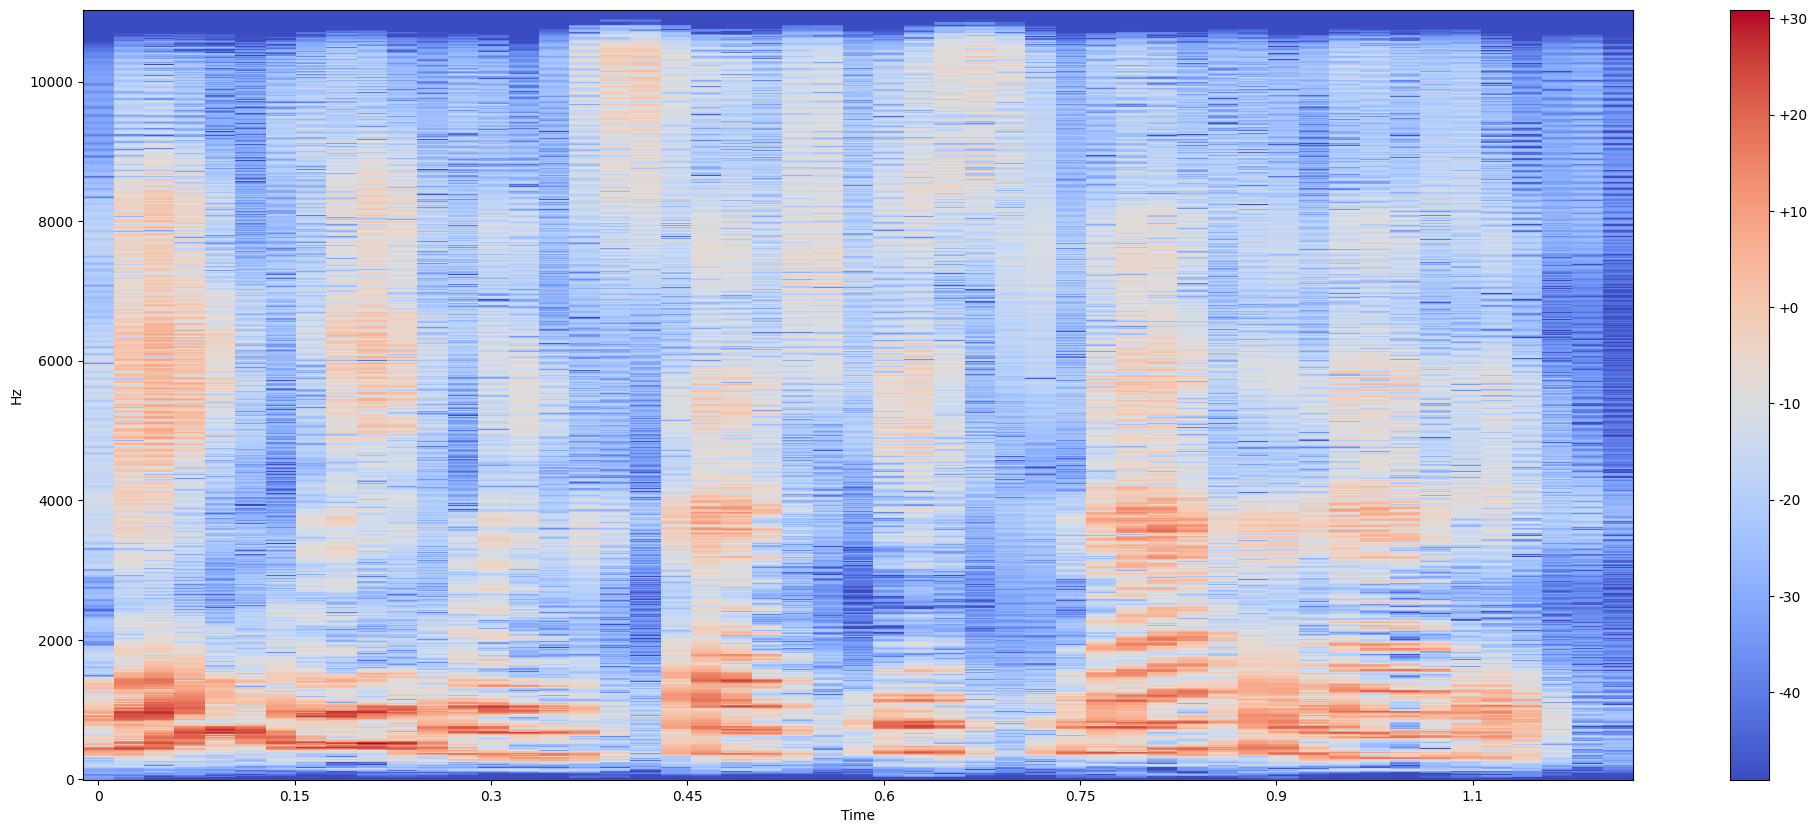

In [ ]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

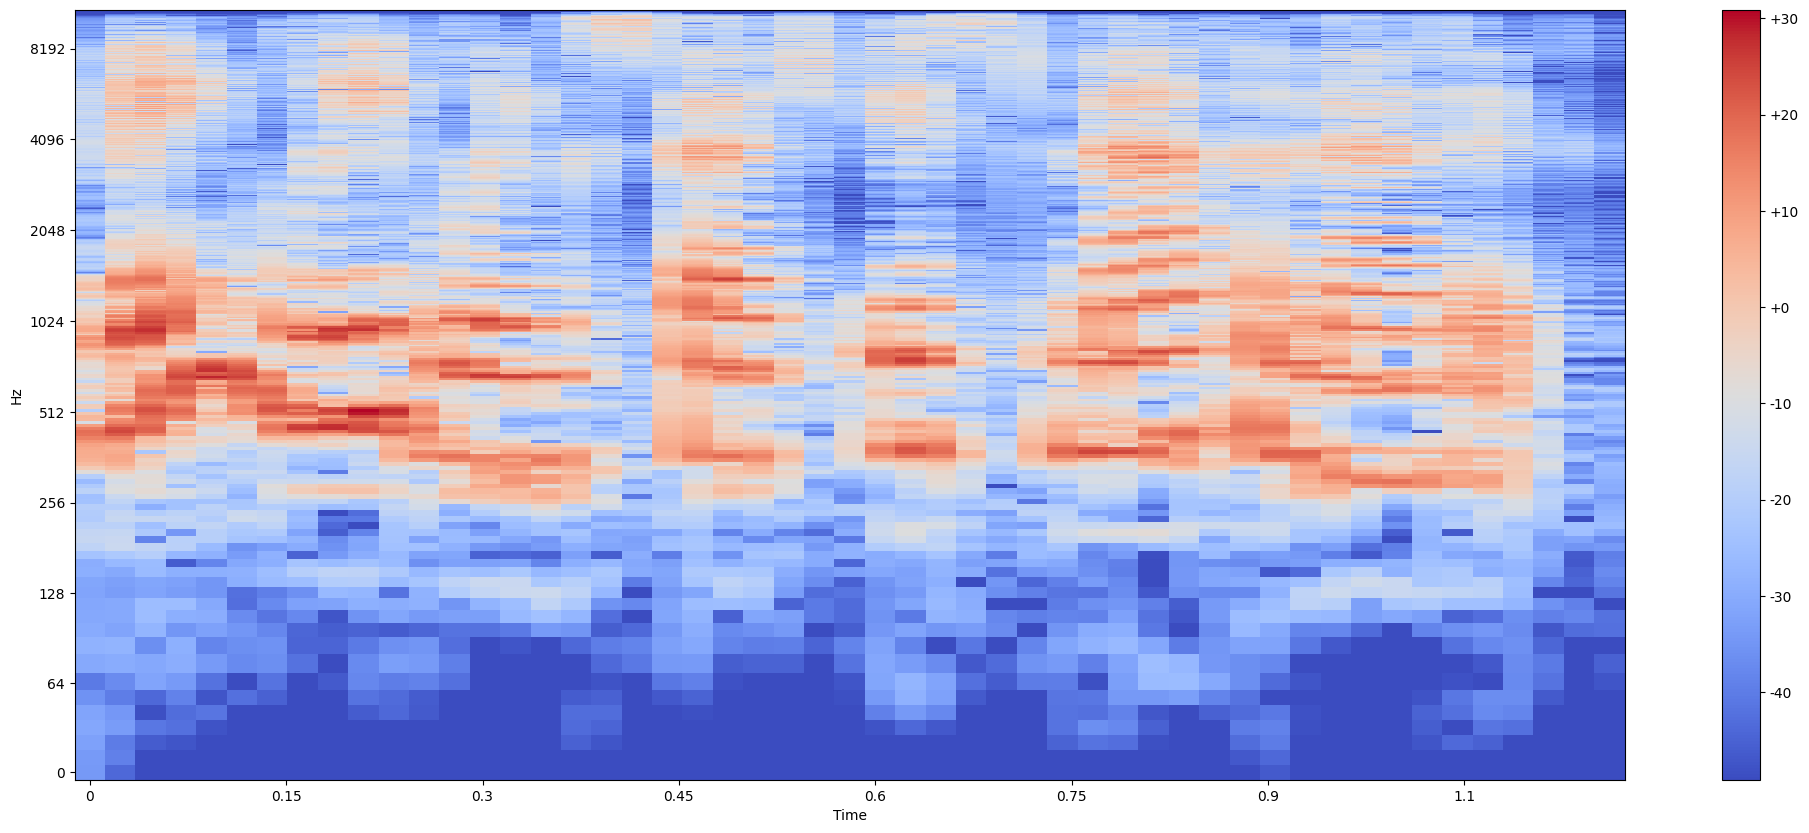

In [ ]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [ ]:
print("enter speed")
s=float(input())

enter speed
4


In [ ]:

sentence = a
out = model.predict(sentence, speed_regulator=s)
wav = audio.reconstruct_waveform(out['mel'].numpy().T)
ipd.display(ipd.Audio(wav, rate=config['sampling_rate']))

### MelGAN

In [ ]:
# Do some sys cleaning
sys.path.remove(TTS_path)
sys.modules.pop('model')

<module 'model' from '/content/TransformerTTS/model/__init__.py'>

In [ ]:
sys.path.append(MelGAN_path)
import torch
import numpy as np

vocoder = torch.hub.load('seungwonpark/melgan', 'melgan')
vocoder.eval()

mel = torch.tensor(out_normal['mel'].numpy().T[np.newaxis,:,:])

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/seungwonpark/melgan/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/seungwonpark/melgan/releases/download/v0.3-alpha/nvidia_tacotron2_LJ11_epoch6400.pt" to /root/.cache/torch/hub/checkpoints/nvidia_tacotron2_LJ11_epoch6400.pt
100%|██████████| 16.3M/16.3M [00:00<00:00, 24.1MB/s]


In [ ]:
if torch.cuda.is_available():
    vocoder = vocoder.cuda()
    mel = mel.cuda()

with torch.no_grad():
    audio = vocoder.inference(mel)

In [ ]:
p=np.array([[0,18000],[1,24000],[2,30000]])

In [ ]:
print("enter 0 for male, 1 for female, 2 for child")
x=int(input())

enter 0 for male, 1 for female, 2 for child
0


In [ ]:
# Display audio
ipd.display(ipd.Audio(audio.cpu().numpy(), rate=p[x][1]))